# World Happiness Report Analysis and Prediction

Analysed the world happiness dataset and created a prediction model using Multiple Linear Regression using the World Happiness Report of the last 15 years. <br> 
Dataset Source: The World Happiness Report

The World Happiness Report is a publication from the United Nations that contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various life factors.

In [5]:
#importing libraries
library(plyr)
library(dplyr)
library(tidyverse)
library(caTools)
library(ggplot2)
library(ggthemes)
#library(reshape2)
#library(data.table)
library(rwa)
library(ggpubr)
library(tidyr)
library(corrgram)       
library(corrplot)

Warning message:
"package 'plyr' was built under R version 4.0.5"

Attaching package: 'plyr'


The following object is masked from 'package:corrgram':

    baseball


Warning message:
"package 'dplyr' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [6]:
#Loading dataset
happ_all <- read.csv("world-happiness-report.csv")
str(happ_all)

'data.frame':	1949 obs. of  11 variables:
 $ ï..Country.name                 : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ year                            : int  2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 ...
 $ Life.Ladder                     : num  3.72 4.4 4.76 3.83 3.78 ...
 $ Log.GDP.per.capita              : num  7.37 7.54 7.65 7.62 7.71 ...
 $ Social.support                  : num  0.451 0.552 0.539 0.521 0.521 0.484 0.526 0.529 0.559 0.491 ...
 $ Healthy.life.expectancy.at.birth: num  50.8 51.2 51.6 51.9 52.2 ...
 $ Freedom.to.make.life.choices    : num  0.718 0.679 0.6 0.496 0.531 0.578 0.509 0.389 0.523 0.427 ...
 $ Generosity                      : num  0.168 0.19 0.121 0.162 0.236 0.061 0.104 0.08 0.042 -0.121 ...
 $ Perceptions.of.corruption       : num  0.882 0.85 0.707 0.731 0.776 0.823 0.871 0.881 0.793 0.954 ...
 $ Positive.affect                 : num  0.518 0.584 0.618 0.611 0.71 0.621 0.532 0.554 0.565 0.496 ...
 $ Negative.affect     

In [7]:
dim(happ_all)

[1] 1949   11

In [8]:
#Renaming columns for convenience
happ_all <- happ_all %>% rename(c("Country" = "ï..Country.name" ,
                      "Score" = "Life.Ladder",
                      "GDP" = "Log.GDP.per.capita", 
                      "Family" = "Social.support",
                      "Health" = "Healthy.life.expectancy.at.birth", 
                      "Freedom" = "Freedom.to.make.life.choices",
                      "Corruption" = "Perceptions.of.corruption"))


In [9]:
head(happ_all)

,Country,year,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Positive.affect,Negative.affect
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
2,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
3,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
4,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
5,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
6,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273


In [10]:
happ_2021=happ_all[happ_all$year == 2020, ]  
happ_2021

,Country,year,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Positive.affect,Negative.affect
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891,0.679,0.265
52,Argentina,2020,5.901,9.850,0.897,69.2,0.823,-0.122,0.816,0.764,0.342
80,Australia,2020,7.137,10.760,0.937,74.2,0.905,0.210,0.491,0.769,0.205
93,Austria,2020,7.213,10.851,0.925,73.6,0.912,0.011,0.464,0.769,0.206
118,Bahrain,2020,6.173,10.620,0.848,69.7,0.945,0.132,NA,0.790,0.297
133,Bangladesh,2020,5.280,8.472,0.739,65.3,0.777,-0.009,0.742,0.582,0.332
161,Belgium,2020,6.839,10.771,0.904,72.4,0.767,-0.164,0.634,0.647,0.260
175,Benin,2020,4.408,8.102,0.507,55.1,0.783,-0.083,0.532,0.609,0.305
193,Bolivia,2020,5.559,8.998,0.805,64.2,0.877,-0.054,0.868,0.790,0.382


In [ ]:
dim(happ_2021)

In [11]:
happ_2021[order(happ_2021$Score),]

,Country,year,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Positive.affect,Negative.affect
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1949,Zimbabwe,2020,3.160,7.829,0.717,56.80,0.643,-0.009,0.789,0.703,0.346
1712,Tanzania,2020,3.786,7.881,0.740,58.50,0.830,0.295,0.521,0.686,0.271
875,Jordan,2020,4.094,9.150,0.709,67.20,0.779,-0.150,NA,NA,NA
747,India,2020,4.225,8.703,0.617,60.90,0.906,0.075,0.780,0.752,0.383
278,Cambodia,2020,4.377,8.362,0.724,62.40,0.963,0.052,0.863,0.878,0.390
175,Benin,2020,4.408,8.102,0.507,55.10,0.783,-0.083,0.532,0.609,0.305
1191,Myanmar,2020,4.431,8.554,0.796,59.60,0.825,0.470,0.647,0.800,0.289
1197,Namibia,2020,4.451,9.104,0.741,57.10,0.666,-0.104,0.810,0.648,0.248
513,Egypt,2020,4.472,9.383,0.673,62.30,0.770,-0.112,NA,0.599,0.442


In [12]:
happ_2021 <- read.csv("world-happiness-report-2021.csv")
head(happ_2021)

,ï..Country.name,Regional.indicator,Ladder.score,Standard.error.of.ladder.score,upperwhisker,lowerwhisker,Logged.GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Ladder.score.in.Dystopia,Explained.by..Log.GDP.per.capita,Explained.by..Social.support,Explained.by..Healthy.life.expectancy,Explained.by..Freedom.to.make.life.choices,Explained.by..Generosity,Explained.by..Perceptions.of.corruption,Dystopia...residual
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
2,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
3,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
4,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
5,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
6,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580


In [13]:
happ_2021 <- happ_2021[, -c(2,4,5,6,13,14,15,16,17,18,19)] #dropping unnecessary columns

In [14]:
#Renaming columns for convenience
happ_2021 <- happ_2021 %>% rename(c("Country" = "ï..Country.name" ,
                      "Score" = "Ladder.score",
                      "GDP" = "Logged.GDP.per.capita", 
                      "Family" = "Social.support",
                      "Health" = "Healthy.life.expectancy", 
                      "Freedom" = "Freedom.to.make.life.choices",
                      "Corruption" = "Perceptions.of.corruption"))

In [15]:
head(happ_2021)

,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Dystopia...residual
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868
3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839
4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967
5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798
6,Norway,7.392,11.053,0.954,73.3,0.960,0.093,0.270,2.580


In [16]:
happ_2021 <- happ_2021 %>% mutate(Rank = row_number())
happ_2021 <- happ_2021 %>% select(Rank, Country, everything())
head(happ_2021)

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Dystopia...residual
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
2,2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868
3,3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839
4,4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967
5,5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798
6,6,Norway,7.392,11.053,0.954,73.3,0.960,0.093,0.270,2.580


<b> Correlation matrix </b> <br>
To find out which factors correlate the most with the happiness quotient

In [17]:
library(corrgram) 
library(corrplot)

#library(rpart) 

#library(ggplot2) 
#library(ggthemes) 
num.cols <- sapply(happ_2021,is.numeric) 
cor.data <- cor(happ_2021[,num.cols]) 
print(cor.data)

                           Rank       Score         GDP      Family     Health
Rank                 1.00000000 -0.98426526 -0.79698747 -0.75102401 -0.7759416
Score               -0.98426526  1.00000000  0.78975970  0.75688765  0.7680995
GDP                 -0.79698747  0.78975970  1.00000000  0.78529868  0.8594606
Family              -0.75102401  0.75688765  0.78529868  1.00000000  0.7232561
Health              -0.77594156  0.76809946  0.85946062  0.72325613  1.0000000
Freedom             -0.60641135  0.60775307  0.43232349  0.48292977  0.4614939
Generosity           0.03966234 -0.01779928 -0.19928640 -0.11494585 -0.1617503
Corruption           0.40065425 -0.42114000 -0.34233742 -0.20320698 -0.3643735
Dystopia...residual -0.46354759  0.49200990 -0.04111918  0.00668051 -0.0234329
                       Freedom  Generosity  Corruption Dystopia...residual
Rank                -0.6064113  0.03966234  0.40065425         -0.46354759
Score                0.6077531 -0.01779928 -0.42114000      

                           Rank       Score         GDP      Family     Health
Rank                 1.00000000 -0.98426526 -0.79698747 -0.75102401 -0.7759416
Score               -0.98426526  1.00000000  0.78975970  0.75688765  0.7680995
GDP                 -0.79698747  0.78975970  1.00000000  0.78529868  0.8594606
Family              -0.75102401  0.75688765  0.78529868  1.00000000  0.7232561
Health              -0.77594156  0.76809946  0.85946062  0.72325613  1.0000000
Freedom             -0.60641135  0.60775307  0.43232349  0.48292977  0.4614939
Generosity           0.03966234 -0.01779928 -0.19928640 -0.11494585 -0.1617503
Corruption           0.40065425 -0.42114000 -0.34233742 -0.20320698 -0.3643735
Dystopia...residual -0.46354759  0.49200990 -0.04111918  0.00668051 -0.0234329
                       Freedom  Generosity  Corruption Dystopia...residual
Rank                -0.6064113  0.03966234  0.40065425         -0.46354759
Score                0.6077531 -0.01779928 -0.42114000      

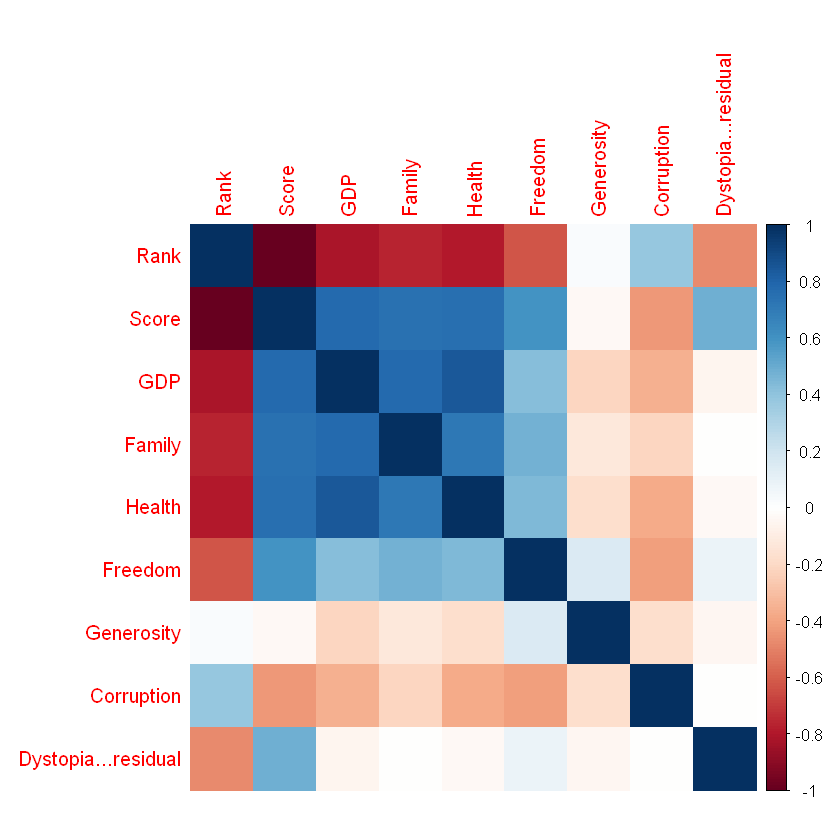

In [18]:
print(corrplot(cor.data, method = 'color'))

Hence, happiness most strongly correlates with the attributes of GDP, Health, Social Support(Family) and Freedom.

In [19]:
# Creating a new column for continents

happ_2021$Continent <- NA

happ_2021$Continent[which(happ_2021$Country %in% c("Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                                   "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                                   "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                                   "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                                   "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                                   "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                                   "Cambodia", "Afghanistan", "Yemen", "Syria"))] <- "Asia"
happ_2021$Continent[which(happ_2021$Country %in% c("Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                                   "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                                   "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                                   "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                                   "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                                   "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                                   "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                                   "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                                   "Bulgaria", "Albania", "Ukraine"))] <- "Europe"
happ_2021$Continent[which(happ_2021$Country %in% c("Canada", "Costa Rica", "United States", "Mexico",  
                                   "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                                   "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                                   "Haiti"))] <- "North America"
happ_2021$Continent[which(happ_2021$Country %in% c("Chile", "Brazil", "Argentina", "Uruguay",
                                   "Colombia", "Ecuador", "Bolivia", "Peru",
                                   "Paraguay", "Venezuela"))] <- "South America"
happ_2021$Continent[which(happ_2021$Country %in% c("New Zealand", "Australia"))] <- "Australia"
happ_2021$Continent[which(is.na(happ_2021$Continent))] <- "Africa"


# Changing Continent column to factor

happ_2021$Continent <- as.factor(happ_2021$Continent)

head(happ_2021)
str(happ_2021)

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Dystopia...residual,Continent
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253,Europe
2,2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868,Europe
3,3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839,Europe
4,4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967,Europe
5,5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798,Europe
6,6,Norway,7.392,11.053,0.954,73.3,0.960,0.093,0.270,2.580,Europe


'data.frame':	149 obs. of  11 variables:
 $ Rank               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country            : chr  "Finland" "Denmark" "Switzerland" "Iceland" ...
 $ Score              : num  7.84 7.62 7.57 7.55 7.46 ...
 $ GDP                : num  10.8 10.9 11.1 10.9 10.9 ...
 $ Family             : num  0.954 0.954 0.942 0.983 0.942 0.954 0.934 0.908 0.948 0.934 ...
 $ Health             : num  72 72.7 74.4 73 72.4 73.3 72.7 72.6 73.4 73.3 ...
 $ Freedom            : num  0.949 0.946 0.919 0.955 0.913 0.96 0.945 0.907 0.929 0.908 ...
 $ Generosity         : num  -0.098 0.03 0.025 0.16 0.175 0.093 0.086 -0.034 0.134 0.042 ...
 $ Corruption         : num  0.186 0.179 0.292 0.673 0.338 0.27 0.237 0.386 0.242 0.481 ...
 $ Dystopia...residual: num  3.25 2.87 2.84 2.97 2.8 ...
 $ Continent          : Factor w/ 6 levels "Africa","Asia",..: 4 4 4 4 4 4 4 4 3 4 ...


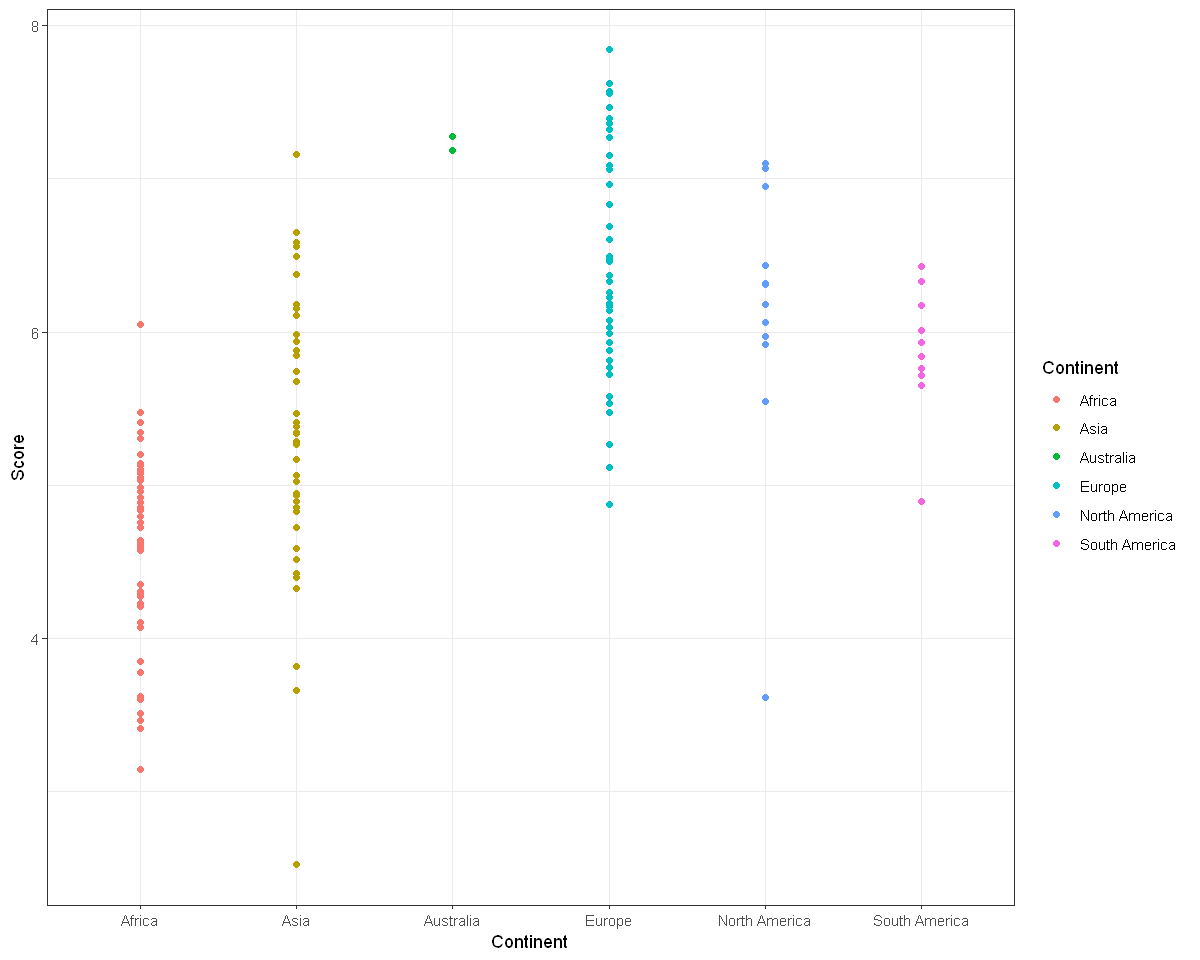

In [20]:
options(repr.plot.width=10, repr.plot.height=8)
gg1 <- ggplot(happ_2021,
              aes(x=Continent,
                  y=Score,
                  color=Continent))+
  geom_point() + theme_bw() 
gg1

<b> Prediction </b> <br>
Splitting dataset to training and testing datasets and using Linear Regression to predict the dependent variable for a country (Happiness Score)

In [21]:
library(caTools)
set.seed(123)
dataset <- happ_2021[3:10] #relevant columns into training
split = sample.split(dataset$Score, SplitRatio = 0.7) #splitting
training_set = subset(dataset, split == TRUE) #training set
test_set = subset(dataset, split == FALSE) #test set

In [22]:
regressor_lm = lm(formula = Score ~ .,
               data = training_set)

summary(regressor_lm) 


Call:
lm(formula = Score ~ ., data = training_set)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0019526 -0.0005332 -0.0001061  0.0005323  0.0020082 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -4.563e+00  1.203e-03   -3792   <2e-16 ***
GDP                  3.494e-01  1.557e-04    2244   <2e-16 ***
Family               2.252e+00  1.232e-03    1828   <2e-16 ***
Health               3.147e-02  2.359e-05    1334   <2e-16 ***
Freedom              1.219e+00  9.658e-04    1262   <2e-16 ***
Generosity           6.518e-01  5.931e-04    1099   <2e-16 ***
Corruption          -6.386e-01  5.500e-04   -1161   <2e-16 ***
Dystopia...residual  9.999e-01  1.530e-04    6535   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0008327 on 96 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.448e+07 on 7 and 96 DF,  p-value: < 2.2e-16

An adjusted R-squared of 1 is obtained. The Multiple Linear Regression predicts happiness scores with an accuracy of 100%.

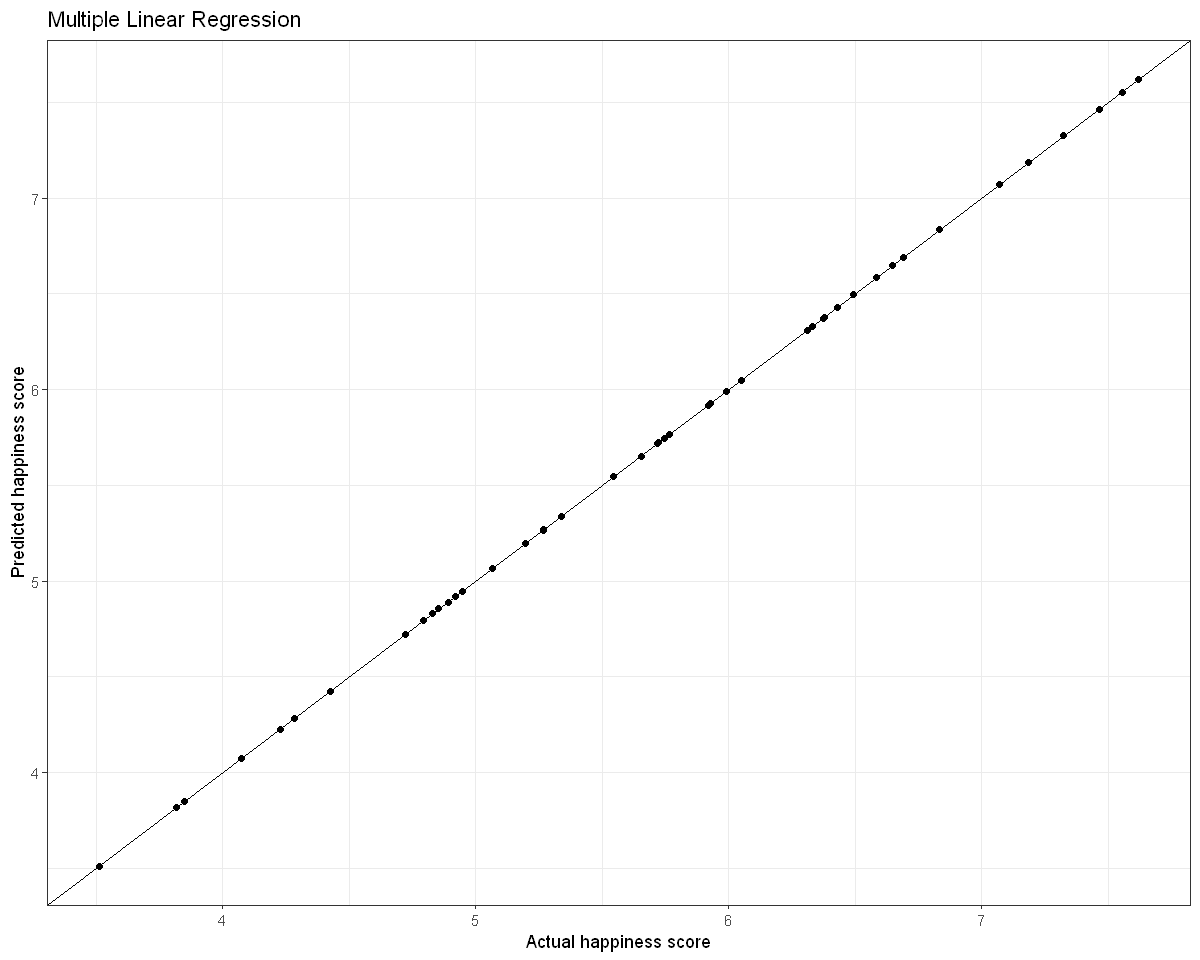

In [24]:
y_pred_lm = predict(regressor_lm, newdata = test_set)

Pred_Actual_lm <- as.data.frame(cbind(Prediction = y_pred_lm, Actual = test_set$Score))

gg.lm <- ggplot(Pred_Actual_lm, aes(Actual, Prediction )) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "Multiple Linear Regression", x = "Actual happiness score",
       y = "Predicted happiness score")

gg.lm

In [25]:
MSE.lm <- sum((test_set$Happiness.Score - y_pred_lm)^2)/nrow(test_set)
print(paste("Mean Squared Error (Multiple Linear Regression):", MSE.lm))

[1] "Mean Squared Error (Multiple Linear Regression): 0"


In [26]:
test1 <- data.frame(GDP = 10.555,
                  Family = 0.867,
                  Health = 71.02,
                  Freedom = 0.923,
                  Generosity = 0.021,
                  Corruption = 0.723,
                  Dystopia...residual = 2.463)
print(paste("Happiness Score: ", round(predict(regressor_lm, test1), 2)))

[1] "Happiness Score:  6.45"


On providing the above test inputs, the model predicts this set's Happiness Score to be 6.45 which would put this sample country somewhere in the top 30 happiest countries in the current scenario. 

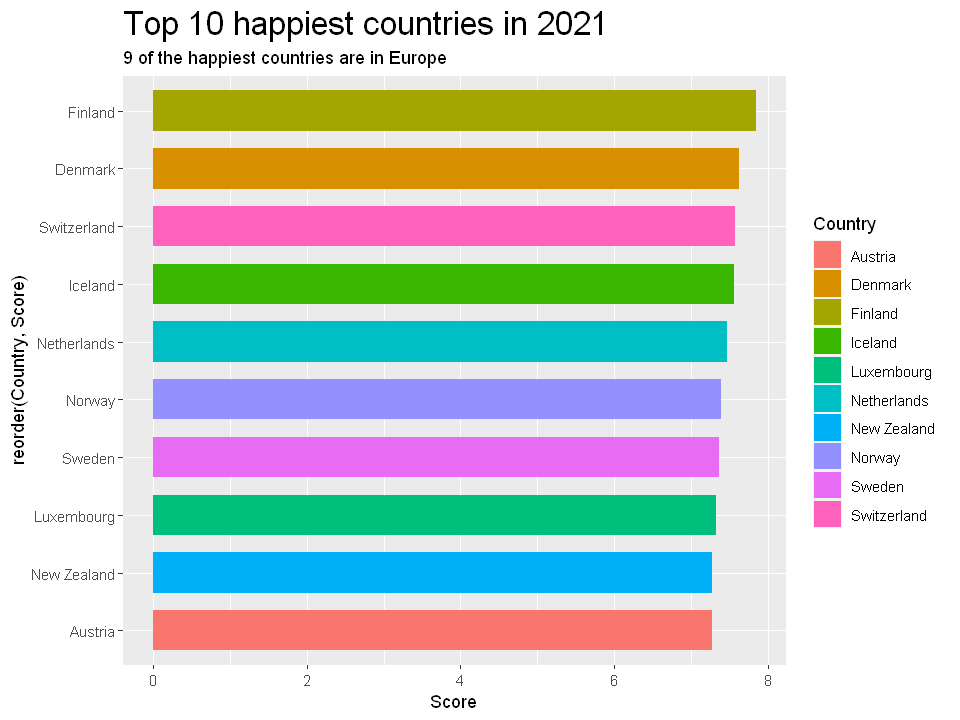

In [27]:
options(repr.plot.width=8, repr.plot.height=6)

ggplot(happ_2021[1:10,], aes(x = reorder(Country, Score), y=Score, fill = Country)) +  ggtitle("Top 10 happiest countries in 2021", subtitle = "9 of the happiest countries are in Europe") + geom_bar(stat="identity", width=0.7) + theme(plot.title = element_text(size=20)) + coord_flip()

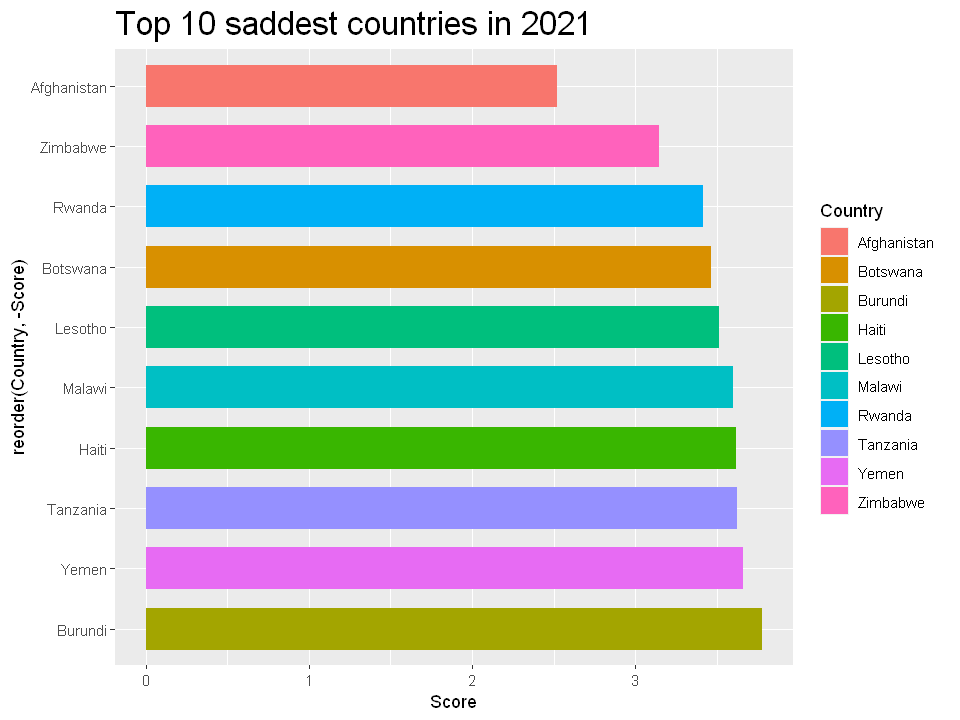

In [28]:
ggplot(happ_2021[140:149,], aes(x = reorder(Country, -Score), y=Score, fill = Country)) + ggtitle("Top 10 saddest countries in 2021") + geom_bar(stat="identity", width=0.7) + theme(plot.title = element_text(size=20)) + coord_flip()

In [29]:
df_cor <- happ_2021 %>% 
    select(corruption = Corruption,
           generosity = Generosity,
           freedom = Freedom, 
           life_expectancy = Health, 
           social_support = Family,
           GDP_per_capita = GDP, 
           happiness = Score
           )

In [30]:
#library(rwa)
predictors = colnames(df_cor)[1:6]
outcome = 'happiness'
rwa <- rwa(df_cor,
    outcome = outcome,
    predictors = predictors,
    applysigns = FALSE) 

rsquare <- rwa$rsquare
(relative_weight <- rwa$result)
n <- rwa$n

Warning message:
"package 'rwa' was built under R version 4.0.5"


Variables,Raw.RelWeight,Rescaled.RelWeight,Sign
<chr>,<dbl>,<dbl>,<chr>
corruption,0.056954334,7.5351657,-
generosity,0.005739968,0.7594086,+
freedom,0.128909062,17.0549117,+
life_expectancy,0.177156666,23.4381606,+
social_support,0.191970060,25.3980005,+
GDP_per_capita,0.195117048,25.8143529,+


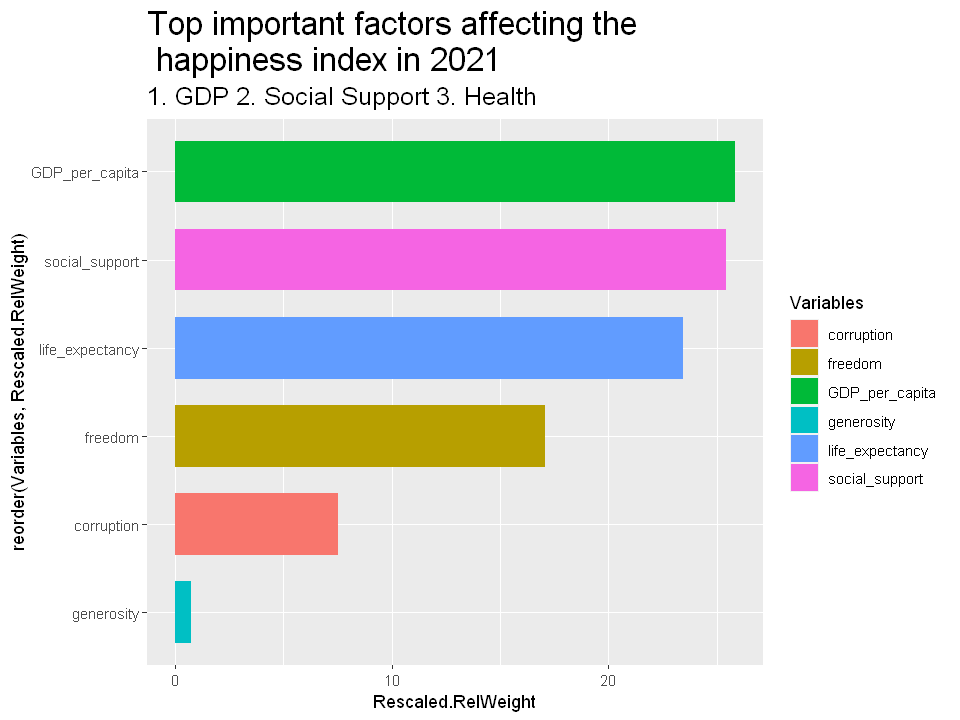

In [31]:
ggplot(relative_weight, aes(x = reorder(Variables, Rescaled.RelWeight), y=Rescaled.RelWeight, fill = Variables)) +  ggtitle("Top important factors affecting the \n happiness index in 2021", subtitle = "1. GDP 2. Social Support 3. Health") + geom_bar(stat="identity", width=0.7) + theme(plot.title = element_text(size=20), plot.subtitle = element_text(size=15)) + coord_flip()

<b> Performing some visualizations on data from India </b> <br>
This year India stood 139th out of 149 countries in the Happiness Report. Last year, India's rank was 140th.

In [32]:
happ_ind=happ_all[happ_all$Country == "India", ]  
happ_ind

,Country,year,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Positive.affect,Negative.affect
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
733,India,2006,5.348,8.145,0.707,55.72,0.774,NA,0.855,0.687,0.199
734,India,2007,5.027,8.204,0.569,56.14,0.729,-0.051,0.862,0.668,0.253
735,India,2008,5.146,8.220,0.684,56.56,0.756,-0.072,0.891,0.674,0.259
736,India,2009,4.522,8.281,0.653,56.98,0.679,-0.026,0.895,0.771,0.301
737,India,2010,4.989,8.349,0.605,57.40,0.783,0.058,0.863,0.697,0.267
738,India,2011,4.635,8.387,0.553,57.70,0.838,-0.038,0.908,0.648,0.232
739,India,2012,4.720,8.428,0.511,58.00,0.609,0.067,0.830,0.629,0.295
740,India,2013,4.428,8.478,0.553,58.30,0.740,0.084,0.832,0.680,0.330
741,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,0.711,0.285


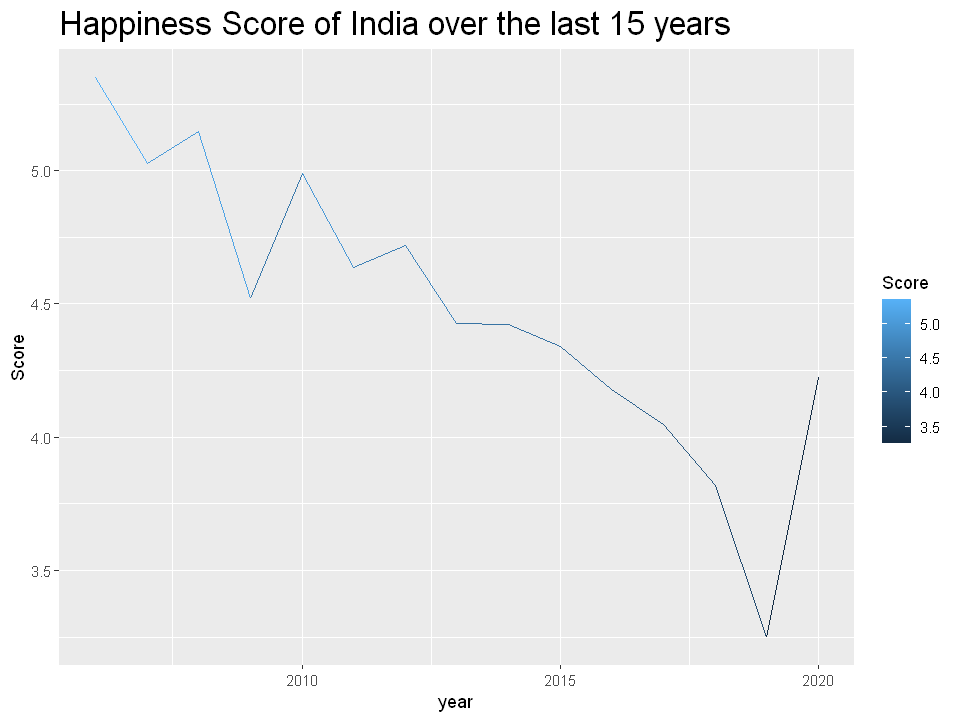

In [33]:
ggplot(data = happ_ind, mapping=aes(x = year, y = Score, color=Score)) + geom_line() + ggtitle("Happiness Score of India over the last 15 years") + theme(plot.title = element_text(size=20))

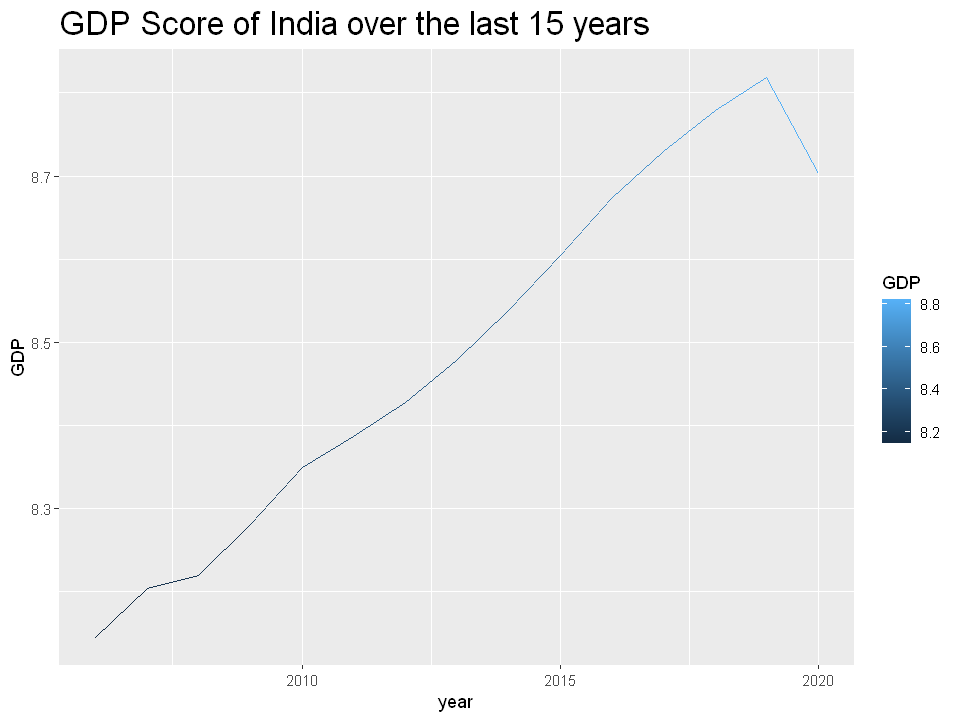

In [34]:
ggplot(data = happ_ind, mapping=aes(x = year, y = GDP, color=GDP)) + geom_line() + ggtitle("GDP Score of India over the last 15 years") + theme(plot.title = element_text(size=20))

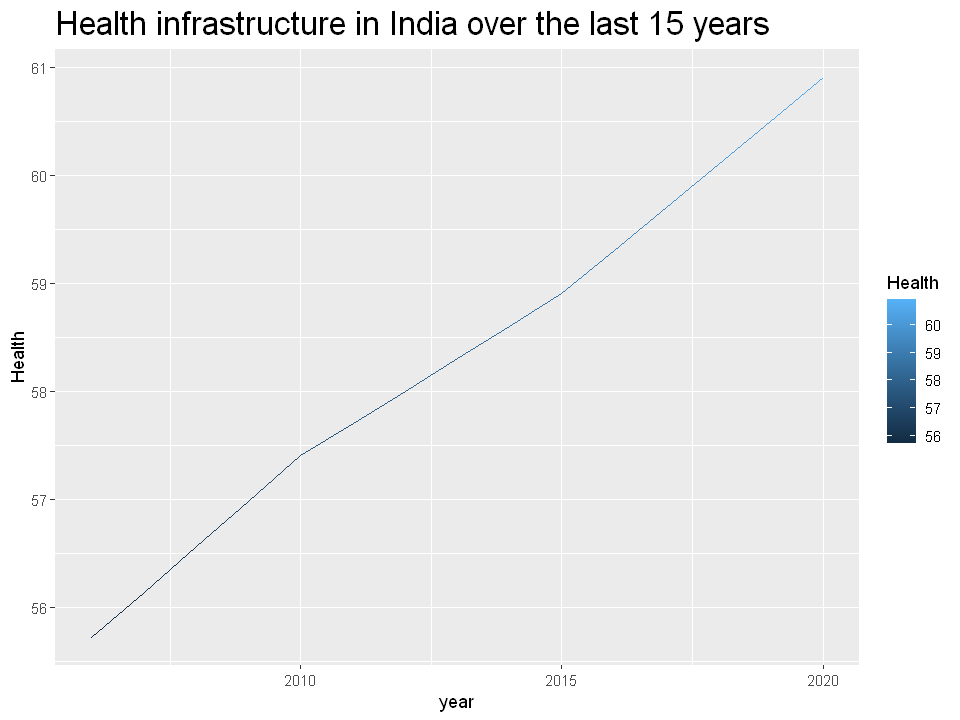

In [35]:
ggplot(data = happ_ind, mapping=aes(x = year, y = Health, color=Health)) + geom_line() + ggtitle("Health infrastructure in India over the last 15 years") + theme(plot.title = element_text(size=20))

In [37]:
mean(happ_ind$Score)
mean(happ_all$Score)

[1] 4.4732

[1] 5.466705

In [38]:
median(happ_2021$Health)

[1] 66.603

In [39]:
sd(happ_2021$GDP)

[1] 1.158601

In [40]:
max_country=happ_all[happ_all$Score == max(happ_all$Score), ]  
max_country

,Country,year,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Positive.affect,Negative.affect
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
450,Denmark,2005,8.019,10.851,0.972,69.6,0.971,NA,0.237,0.86,0.154


Country with the highest ever happiness score in 15 years is Denmark in 2005

In [41]:
min_country=happ_all[happ_all$Score == min(happ_all$Score), ]  
min_country

,Country,year,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Positive.affect,Negative.affect
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,Afghanistan,2019,2.375,7.697,0.42,52.4,0.394,-0.108,0.924,0.351,0.502


Country with the lowest ever happiness score in 15 years is Afghanistan in 2019

In [42]:
head(happ_2021)

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Dystopia...residual,Continent
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253,Europe
2,2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868,Europe
3,3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839,Europe
4,4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967,Europe
5,5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798,Europe
6,6,Norway,7.392,11.053,0.954,73.3,0.960,0.093,0.270,2.580,Europe


<b> Comparing the increase in Happiness coefficients world-wide Pre-Pandemic and Amidst-Pandemic </b>

In [46]:
country_region_dict = happ_2021 %>% select(country = Country, region = Continent) %>% unique()

df_happy_increase <- happ_all %>% 
    filter(year >= 2018) %>%
    left_join(country_region_dict, by = c('Country' = 'country')) %>%
    select(country = Country, year, ladder = Score)  %>%
    pivot_wider(names_from = 'year', names_prefix = 'year', values_from = 'ladder') %>%
    mutate(increase_in_2019 = ifelse(year2019>year2018, 1, 0),
          increase_in_2020 = ifelse(year2020>year2019,1,0))

df_increase_in_2019 <- df_happy_increase %>% summarize(pct = mean(increase_in_2019, na.rm = TRUE))
df_increase_in_2020 <- df_happy_increase %>% summarize(pct = mean(increase_in_2020, na.rm = TRUE))

Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'tidyverse' was built under R version 4.0.5"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.1     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

Warning message:
"package 'tibble' was built under R version 4.0.5"
Warning message:
"package 'readr' was built under R version 4.0.5"
Warning message:
"package 'purrr' was built under R version 4.0.5"
Warning message:
"package 'stringr' was built under R version 4.0.5"
Warning message:
"package 'forcats' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filte

Warning message:
"package 'ggpubr' was built under R version 4.0.5"

Attaching package: 'ggpubr'


The following object is masked from 'package:plyr':

    mutate




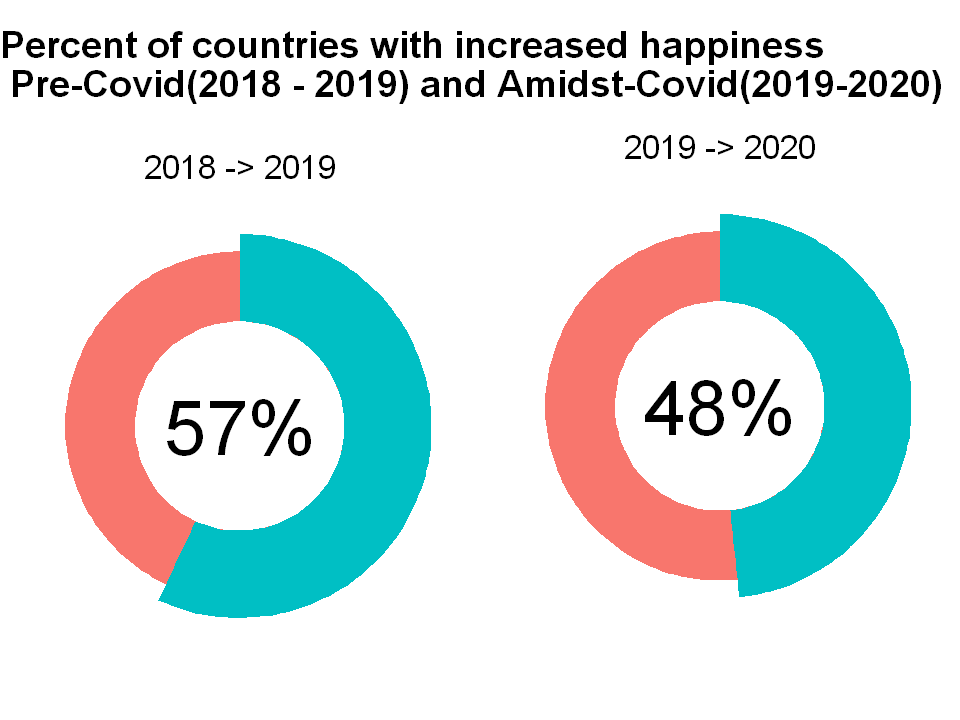

In [47]:
#library(ggpubr)
donut_plot <- function(df, title = '', subtitle = '', caption = '') {
ggplot(df) +
    geom_rect(aes(ymax = 1, ymin = 0, xmax = 2, xmin=1.2, fill = "base"))  +
    geom_rect(aes(ymax = pct, ymin = 0, xmax = 2.2, xmin = 1.2, fill = 'main')) +
    geom_text(x = 0, y = 0, label = paste0(round(df$pct*100,0),'%'), size = 16) + 
    coord_polar(theta = 'y') +
    xlim(c(0,2.2)) +
    labs(title = title, subtitle = subtitle, caption = caption) +
    theme_void() + 
    theme(plot.title = element_text(size=22, face="bold"),
          plot.subtitle = element_text(size = 20, hjust = 0.5),
          plot.caption = element_text(size = 15),
          legend.position = 'None')}

p1 <- donut_plot(df_increase_in_2019, title = 'Percent of countries with increased happiness\n Pre-Covid(2018 - 2019) and Amidst-Covid(2019-2020)\n', subtitle = '2018 -> 2019')
p2 <- donut_plot(df_increase_in_2020, title = '\n', subtitle = '2019 -> 2020')
figure <- ggarrange(p1, p2, ncol = 2, nrow = 1)
figure